In [3]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
from imp import reload 
import sys
import os
import concurrent.futures



In [70]:
def getDictInfo(element, test_tag, cnt, dictInfo):
    if (True in (element['tag'] == a for a in test_tag)) or (True in (a in element['tag'] for a in test_tag)):
        x = int(element['x'])
        y = int(element['y'])
        w = int(element['width'])
        h = int(element['height'])
        dictInfo.append([x,y,w,h])
        
        
def analyzeDict(img, test_tag):
    dictInfo=[]
    img_test = img.copy()
    ##94 elements
    cnt = 0
    for i in hierarchy_dict:
        cnt+=1
        print('i:',i["tag"], cnt)
        if "_EA@text" in i: print(i["_EA@text"], cnt)
        getDictInfo(i, test_tag, cnt, dictInfo)

        for j in i['child']:
            cnt+=1
            print('j:',j["tag"], cnt)
            if "_EA@text" in j: print(j["_EA@text"], cnt)
            getDictInfo(j, test_tag, cnt, dictInfo)

            for k in j['child']:
                cnt+=1
                print('k:',k["tag"], cnt)
                if "_EA@text" in k: print(k["_EA@text"], cnt)
                getDictInfo(k, test_tag, cnt, dictInfo)

                for l in k['child']:
                    cnt+=1
                    print('l:',l["tag"], cnt)
                    if "_EA@text" in l: print(l["_EA@text"], cnt)
                    getDictInfo(l, test_tag, cnt, dictInfo)

                    for m in l['child']:
                        cnt+=1
                        print('m:',m["tag"], cnt)
                        if "_EA@text" in m: print(m["_EA@text"], cnt)
                        getDictInfo(m, test_tag, cnt, dictInfo)

                        for n in m['child']:
                            cnt+=1
                            print('n:',n["tag"], cnt)
                            if "_EA@text" in n: print(n["_EA@text"], cnt)
                            getDictInfo(n, test_tag, cnt, dictInfo)

                            for o in n['child']:
                                cnt+=1
                                print('o:',o["tag"], cnt)
                                if "_EA@text" in o: print(o["_EA@text"], cnt)
                                getDictInfo(o, test_tag, cnt, dictInfo)



    print('total element num:', cnt)
    
    return dictInfo

In [94]:
##analyze taad dumped dict and experiment

##目前state dict有重複的：mail, spotify, messenger, chrome, pchome
import json
from allProcess import *
reload(sys.modules['allProcess'])
from allProcess import *

IMG_LIST = [1]
IMG_NUM = 7


# print('===========PROCESSING IMAGE NUMBER '+str(IMG_NUM)+'=============')

    
with open('./experiment/'+str(IMG_NUM)+'.json', 'r') as fp:
#with open('./experiment/data.json', 'r') as fp:
    j = json.load(fp)
hierarchy_dict = j['child']

img = cv2.imread('./experiment/'+str(IMG_NUM)+'.png', 1)
#img = cv2.imread('./experiment/currentScreenshot.png', 1)
height,width,_ = img.shape
print('shape:', height,width)
test_tag=['ul','div','li']


dictInfo = analyzeDict(img, test_tag)
contours = allProcess(str(IMG_NUM), True)

##去掉contours和dictInfo重疊的部分，如果bug修好就不用
for d in dictInfo.copy():
    for c in contours:
        if d == c[1]:
            dictInfo.remove(d)

contourInfo = [c for c in contours if c[1][1]+c[1][3]>95]
#implement experiment設為true
##刪掉時間和電池圖示

shape: 2436 1125
i: div 1
j: div 2
k: img 3
Facebook 3
k: button 4
搜尋 4
k: button 5
Messenger 5
j: ['ul', 'div'] 6
k: ['XCUIElementTypeActivityIndicator', 'div'] 7
進行中 7
k: div 8
l: div 9
m: button 10
m: div 11
n: div 12
n: button 13
直播 建立直播視訊 13
n: div 14
n: button 15
相片 建立相片貼文 15
n: div 16
n: button 17
包廂 建立包廂 17
l: div 18
l: div 19
k: div 20
l: div 21
l: div 22
l: div 23
m: div 24
廣播和直播包廂 24
m: ['ul', 'div'] 25
n: ['button', 'div'] 26
建立廣播或直播包廂 26
n: ['div', 'XCUIElementTypeImage', 'button'] 27
陳鴻智的大頭貼照 27
n: ['div', 'XCUIElementTypeImage', 'button'] 28
陳昀聖的大頭貼照 28
n: ['div', 'XCUIElementTypeImage', 'button'] 29
鄭育桀的大頭貼照 29
n: ['div', 'XCUIElementTypeImage', 'button'] 30
吳汶儒的大頭貼照 30
n: ['div', 'XCUIElementTypeImage', 'button'] 31
馮柏諭的大頭貼照 31
n: ['div', 'XCUIElementTypeImage', 'button'] 32
陳佳敏的大頭貼照 32
n: ['div', 'XCUIElementTypeImage', 'button'] 33
徐立恩的大頭貼照 33
l: div 34
l: div 35
k: ['div', 'button'] 36
l: div 37
l: div 38
l: ['ul', 'div'] 39
m: ['div', 'button'] 40
n: ['XCUIElementT

round[0]Box[0]thread[5]: x=34, y=1713, w=157, h=53, confidence: 77, text: 2013年round[0]Box[0]thread[2]: x=828, y=1713, w=188, h=53, confidence: 95, text: 是正確的 [123, [126, 122, 124, -1]]
 [132, [137, 129, 133, -1]]
round[0]Box[0]thread[7]: x=579, y=1713, w=229, h=54, confidence: 91, text: 「服貿協議」 [126, [129, 123, 127, -1]]
round[0]Box[0]thread[3]: x=177, y=1640, w=137, h=47, confidence: 89, text: 50分鐘 [139, [141, 138, 140, -1]]
get text thicker
round[0]Box[0]thread[2]: x=325, y=1582, w=46, h=46, confidence: 45, text: Qe [142, [145, 141, 143, -1]]
round[0]Box[0]thread[6]: x=232, y=1713, w=326, h=53, confidence: 91, text: 如果國民黨認為 [129, [132, 126, 130, -1]]
round[0]Box[0]thread[1]: x=307, y=1773, w=419, h=53, confidence: 94, text: 但沒有立場黑箱操作 [114, [120, 112, 115, -1]]
get text thinnerround[0]Box[0]thread[7]: x=177, y=1578, w=139, h=52, confidence: 90, text: 黃國昌 [145, [146, 142, -1, -1]]

round[0]Box[0]thread[4]: x=348, y=1640, w=47, h=48, confidence: 61, text: a [138, [139, 137, -1, -1]]
get

[[0, 0, 1125, 2202], [0, 132, 1125, 156], [0, 288, 1125, 1914], [534, 183, 60, 60], [0, 288, 1125, 321], [0, 288, 1125, 309], [0, 480, 1125, 117], [0, 480, 1125, 3], [372, 498, 3, 81], [750, 498, 3, 81], [0, 594, 1125, 6], [0, 594, 1125, 15], [0, 606, 1125, 285], [0, 606, 1125, 15], [0, 615, 1125, 6], [0, 618, 1125, 261], [36, 654, 324, 60], [0, 747, 1125, 111], [36, 735, 258, 135], [318, 747, 108, 111], [450, 747, 108, 111], [582, 747, 108, 111], [714, 747, 108, 111], [846, 747, 108, 111], [978, 747, 108, 111], [1110, 747, 108, 111], [0, 876, 1125, 6], [0, 876, 1125, 15], [0, 891, 1125, 624], [0, 891, 1125, 12], [0, 900, 1125, 6], [0, 939, 1125, 528], [36, 939, 297, 528], [36, 939, 297, 348], [36, 939, 297, 528], [72, 1341, 225, 102], [351, 939, 297, 528], [351, 939, 297, 528], [369, 957, 120, 120], [381, 969, 96, 96], [369, 1398, 117, 54], [666, 939, 297, 528], [666, 939, 297, 528], [684, 957, 120, 120], [696, 969, 96, 96], [684, 1350, 246, 102], [981, 939, 297, 528], [981, 939, 297,

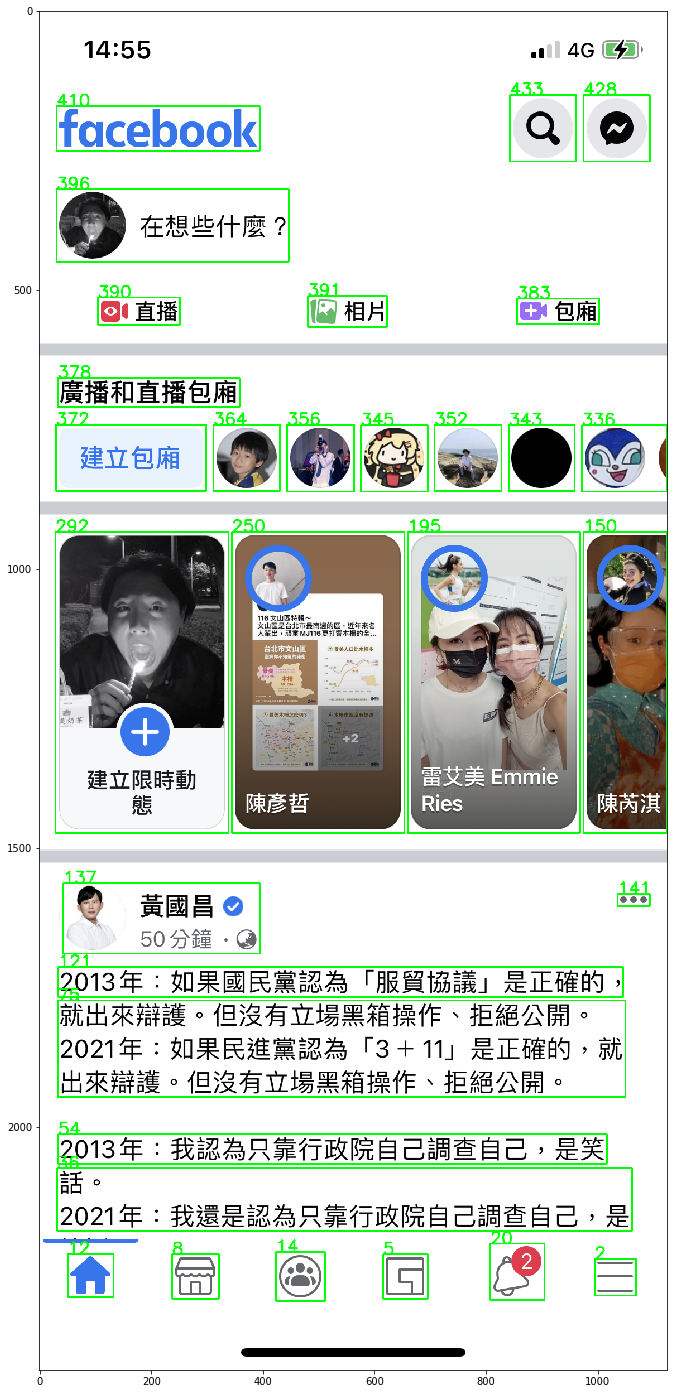

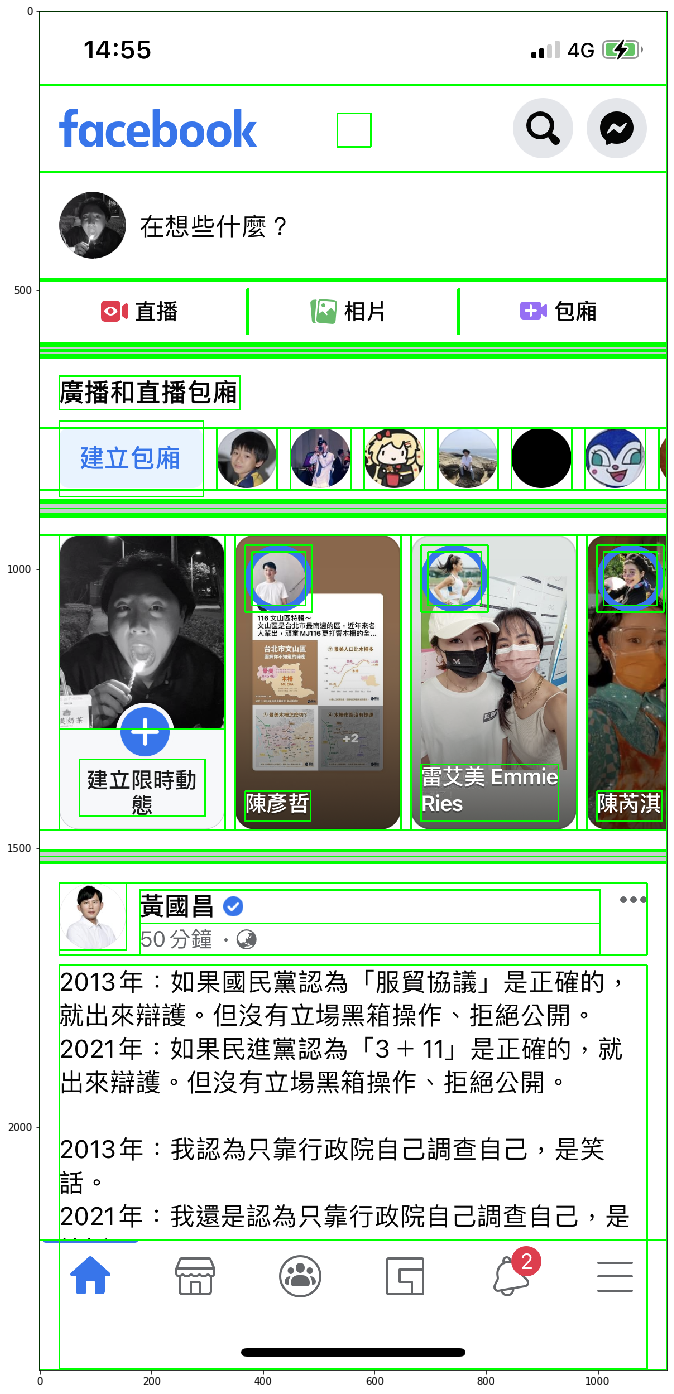

In [95]:

print(dictInfo)
print(contourInfo)

clone = img.copy()
for i,c in enumerate(contourInfo):
    x,y,w,h = c[1]
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(clone, str(c[0][0]), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imwrite('experiment/processed_'+str(IMG_NUM)+'.jpg', clone)
plt.figure(figsize=(50,25))
clone = cv2.cvtColor(clone, cv2.COLOR_BGR2RGB)
plt.imshow(clone)

img_test = img.copy()
for i,d in enumerate(dictInfo):
    x,y,w,h = d
    cv2.rectangle(img_test, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #cv2.putText(img_test, str(cnt), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imwrite('experiment/target_'+str(IMG_NUM)+'.jpg', img_test)
plt.figure(figsize=(50,25))
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
plt.imshow(img_test)

In [18]:
%%time

tp=0
fp=0
fn=0
tn=0

for i in range(0,width+1):
    for j in range(0,height+1):
        for c in contourInfo:
            flag_b = 0 ##用來判斷有沒有在c裡，有的話會變1
            if i in range(c[1][0], c[1][0]+c[1][2]+1) and j in range(c[1][1], c[1][1]+c[1][3]+1):
                ##(i,j)在c裡
                flag_a = 0 ##用來判斷在c裡的有沒有在d裡，有的話會變1
                flag_b = 1
                for d in dictInfo:
                    if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
                        ##(i,j)在c裡且在d裡
                        ##true positive
                        tp+=1
                        flag_a = 1
                        #print([i,j],': tp')
                        break
                if flag_a ==0:
                    ##(i,j)在c裡但不在任何d裡
                    ##false positive
                    fp+=1
                    #print([i,j],': fp')
                    break
                else: break
                    
            if flag_b == 0:
                flag_c = 0 ##用來判斷不在c裡的有沒有在d裡，有的話會變1
                for d in dictInfo:
                    if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
                        ##(i,j)不在任何c裡但是在d裡
                        ##false negative
                        fn+=1
                        flag_c = 1
                        #print([i,j],': fn')
                        break
                if flag_c ==0:
                    ##(i,j)不在任何c裡也不在任何d裡 
                    ##true negative
                    tn+=1
                    #print([i,j],': tn')
                    break
                else: break

                
print(tp,fp,fn,tn)

34900 5060 2187852 516250
CPU times: user 28.4 s, sys: 129 ms, total: 28.6 s
Wall time: 29.8 s


In [9]:
print(tp,fp,fn,tn)
print(img.size)


14400 0 1441993 1287669
8221500


In [7]:
%%time
##facebook:(tp,fp,fn,tn) = (14400 0 1441993 1287669)
##instagram:(tp,fp,fn,tn)=34900 5060 2187852 516250

# a=[(x,y) for x in range(width+1) for y in range(height+1)]
# a=[(x,y) for x in range(5+1) for y in range(5+1)]
# print(len(a))
# NUM_THREADS = os.cpu_count()
# NUM_THREADS = 8
# print('Logical Processors: ',NUM_THREADS)

# tp=0
# fp=0
# fn=0
# tn=0

# def checkPixel(pixel,contourInfo,dictInfo):
#     for c in contourInfo:
#         flag_b = 0 ##用來判斷有沒有在c裡，有的話會變1
#         if i in range(c[1][0], c[1][0]+c[1][2]+1) and j in range(c[1][1], c[1][1]+c[1][3]+1):
#             ##(i,j)在c裡
#             flag_a = 0 ##用來判斷在c裡的有沒有在d裡，有的話會變1
#             flag_b = 1
#             for d in dictInfo:
#                 if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
#                     ##(i,j)在c裡且在d裡
#                     ##true positive
#                     tp+=1
#                     flag_a = 1
#                     print([i,j],': tp',tp)
#                     break
#             if flag_a ==0:
#                 ##(i,j)在c裡但不在任何d裡
#                 ##false positive
#                 fp+=1
#                 print([i,j],': fp',fp)
#                 break
#             else: break

#         if flag_b == 0:
#             flag_c = 0 ##用來判斷不在c裡的有沒有在d裡，有的話會變1
#             for d in dictInfo:
#                 if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
#                     ##(i,j)不在任何c裡但是在d裡
#                     ##false negative
#                     fn+=1
#                     flag_c = 1
#                     print([i,j],': fn',fn)
#                     break
#             if flag_c ==0:
#                 ##(i,j)不在任何c裡也不在任何d裡 
#                 ##true negative
#                 tn+=1
#                 print([i,j],': tn',tn)
#                 break
#             else: break
# with concurrent.futures.ThreadPoolExecutor(NUM_THREADS) as executor:
#     futures = {executor.submit(checkPixel, pixel,contourInfo, dictInfo): pixel for pixel in a}
#     concurrent.futures.wait(futures)

36
Logical Processors:  8
CPU times: user 4.92 ms, sys: 9.95 ms, total: 14.9 ms
Wall time: 21.1 ms
